In [1]:
from src.optimisers.hadamard_gate_reduction import Hadamard_gate_reduction
from src.optimisers.single_qubit_gate_cancellation import Single_qubit_gate_cancellation
from src.converters.netlist_converters import qCircuit_to_netlist, netlist_to_qCircuit
from src.converters.graph_converter import create_graph_from_netlist, create_netlist_from_graph
from src.utils.graphs import plot_graph
from mpqp import QCircuit
from mpqp.gates import X, CNOT, Z, H

In [2]:
h_optimiser = Hadamard_gate_reduction()
s_cancellation = Single_qubit_gate_cancellation()

In [3]:
circ = QCircuit(2)
circ.add(X(1))
circ.add(H(1))
circ.add(X(1))
circ.add(CNOT(0, 1))
circ.add(X(1))
circ.add(H(1))
circ.add(X(1))
print(circ)

                                        
q_0: ─────────────────■─────────────────
     ┌───┐┌───┐┌───┐┌─┴─┐┌───┐┌───┐┌───┐
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘


[X([1]), H([1]), X([1]), CNOT(·[0], [1]), X([1]), H([1]), X([1])]
DiGraph with 7 nodes and 6 edges


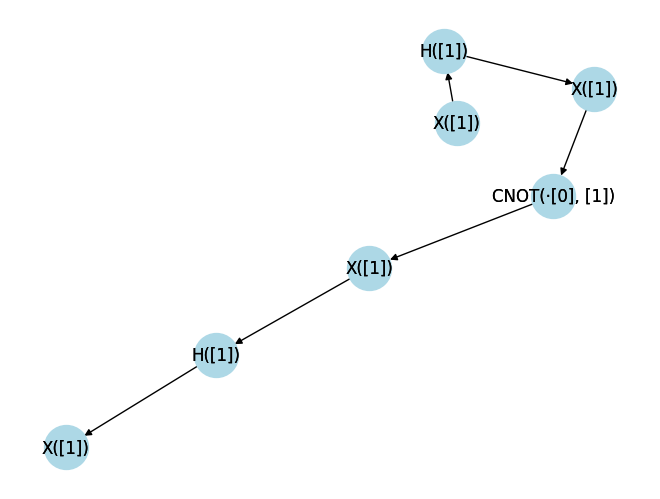

In [4]:
netlist = qCircuit_to_netlist(circ)
print(netlist)
graph = create_graph_from_netlist(netlist)
print(graph)
plot_graph(graph, node_size=1000)

In [5]:
h_optimiser.optimise(graph)
s_cancellation.optimise(graph)

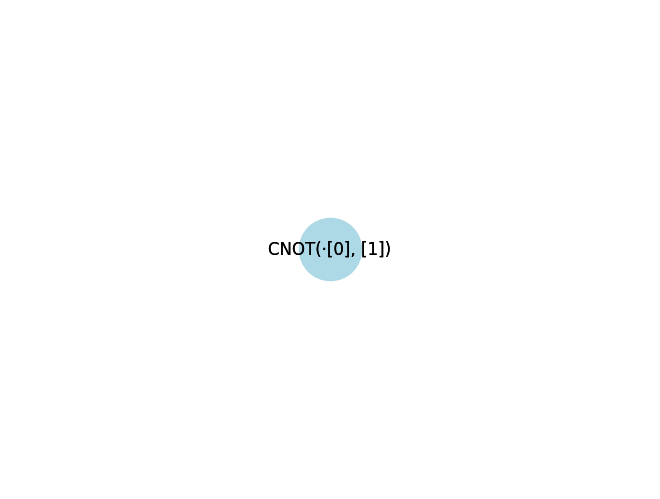

In [6]:
plot_graph(graph)

In [14]:
circ2 = QCircuit(1)
circ2.add(H(0))
circ2.add(H(0))
print(circ2)

   ┌───┐┌───┐
q: ┤ H ├┤ H ├
   └───┘└───┘
